In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.svm import SVC

In [3]:
data = pd.read_csv("./통신고객이탈.csv", engine="python")
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [4]:
data.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [5]:
data.drop("CUSTOMER_ID",axis=1,inplace=True)
data.CHURN.value_counts()

Active     750
Churned    180
Name: CHURN, dtype: int64

In [6]:
data.CHURN = data.CHURN.map(lambda x : 0 if x == 'Active' else 1)
data.CHURN.value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [7]:
data_dummy = pd.get_dummies(data)
data_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

df_y = data_dummy.CHURN
df_x = data_dummy.drop("CHURN",axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (651, 33)
train data Y size: (651,)
test data X size: (279, 33)
test data Y size: (279,)


In [11]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accucary on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accucary on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accucary on training set: 1.000
Accucary on test set: 0.842


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
train_accuracy = []
test_accuracy = []
para_C = []

for C in range(10):
    svm1 = SVC(C=(C+1)/10,random_state=1234)
    para_C.append((C+1)/10)
    svm1.fit(df_train_x,df_train_y)
    train_accuracy.append(svm1.score(df_train_x,df_train_y))
    test_accuracy.append(svm1.score(df_test_x,df_test_y))
    
df_accruacy1 = pd.DataFrame()
df_accruacy1["C"] = para_C
df_accruacy1["TrainAccuracy"] = train_accuracy
df_accruacy1["TestAccuracy"] = test_accuracy

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/svm/

In [13]:
df_accruacy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.1,0.791,0.842
1,0.2,0.791,0.842
2,0.3,0.791,0.842
3,0.4,0.791,0.842
4,0.5,0.791,0.842
5,0.6,0.791,0.842
6,0.7,0.791,0.842
7,0.8,1.000,0.842
8,0.9,1.000,0.842
9,1.0,1.000,0.842


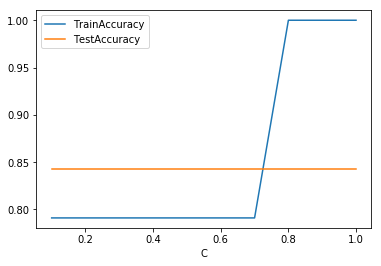

In [15]:
df_accruacy1.set_index("C",inplace=False).plot()

In [16]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2 = SVC(gamma=gamma/10,random_state=1234)
    para_gamma.append(gamma/10)
    svm2.fit(df_train_x,df_train_y)
    train_accuracy.append(svm2.score(df_train_x,df_train_y))
    test_accuracy.append(svm2.score(df_test_x,df_test_y))
    
df_accruacy2 = pd.DataFrame()
df_accruacy2["gamma"] = para_gamma
df_accruacy2["TrainAccuracy"] = train_accuracy
df_accruacy2["TestAccuracy"] = test_accuracy

In [17]:
df_accruacy2.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,1.0,0.842
1,0.2,1.0,0.842
2,0.3,1.0,0.842
3,0.4,1.0,0.842
4,0.5,1.0,0.842
5,0.6,1.0,0.842
6,0.7,1.0,0.842
7,0.8,1.0,0.842
8,0.9,1.0,0.842


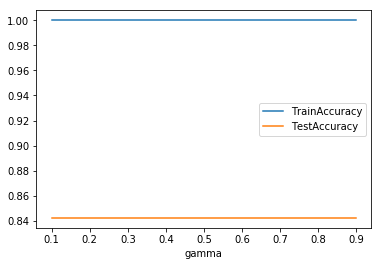

In [18]:
df_accruacy2.set_index("gamma",inplace=False).plot.line()

In [19]:
df_train_x_scaled = scale(df_train_x,axis=0)
df_test_x_scaled = scale(df_test_x,axis=0)
pd.DataFrame(df_train_x_scaled,columns=df_train_x.columns).head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


In [20]:
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(df_train_x_scaled,df_train_y)

print("Accucary on training set: {:.3f}".format(svm_uncustomized_scaled.score(df_train_x_scaled,df_train_y)))
print("Accucary on test set: {:.3f}".format(svm_uncustomized_scaled.score(df_test_x_scaled,df_test_y)))

Accucary on training set: 0.916
Accucary on test set: 0.896


In [27]:
train_accuracy = []
test_accuracy = []
para_C = []

for C in range(15):
    svm1_scaled = SVC(C=C+1,random_state=1234)
    para_C.append(C+1)
    svm1_scaled.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(svm1_scaled.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(svm1_scaled.score(df_test_x_scaled,df_test_y))
    
df_accruacy1_scaled = pd.DataFrame()
df_accruacy1_scaled["C"] = para_C
df_accruacy1_scaled["TrainAccuracy"] = train_accuracy
df_accruacy1_scaled["TestAccuracy"] = test_accuracy

In [28]:
df_accruacy1_scaled.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.916,0.896
1,2,0.935,0.896
2,3,0.948,0.892
3,4,0.954,0.892
4,5,0.959,0.889
5,6,0.962,0.892
6,7,0.968,0.892
7,8,0.968,0.889
8,9,0.972,0.889
9,10,0.975,0.892


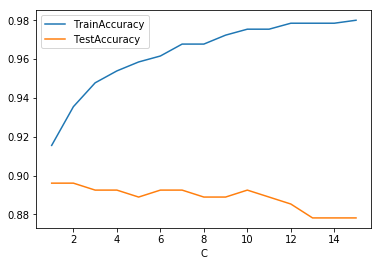

In [29]:
df_accruacy1_scaled.set_index("C",inplace=False).plot.line()

In [24]:
train_accuracy = []
test_accuracy = []
para_gamma = []

for gamma in range(1,10):
    svm2_scaled = SVC(gamma=gamma/10,random_state=1234)
    para_gamma.append(gamma/10)
    svm2_scaled.fit(df_train_x_scaled,df_train_y)
    train_accuracy.append(svm2_scaled.score(df_train_x_scaled,df_train_y))
    test_accuracy.append(svm2_scaled.score(df_test_x_scaled,df_test_y))
    
df_accruacy2_scaled = pd.DataFrame()
df_accruacy2_scaled["gamma"] = para_gamma
df_accruacy2_scaled["TrainAccuracy"] = train_accuracy
df_accruacy2_scaled["TestAccuracy"] = test_accuracy

In [25]:
df_accruacy2_scaled.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.1,0.959,0.885
1,0.2,0.978,0.857
2,0.3,0.980,0.842
3,0.4,0.986,0.846
4,0.5,0.991,0.846
5,0.6,0.995,0.846
6,0.7,0.997,0.846
7,0.8,0.997,0.842
8,0.9,0.997,0.842


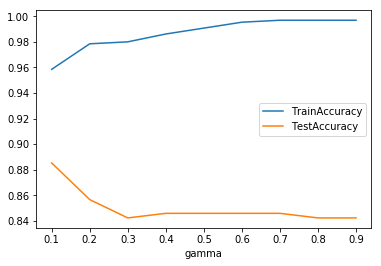

In [26]:
df_accruacy2_scaled.set_index("gamma",inplace=False).plot.line()